<a href="https://colab.research.google.com/github/Zauverer/Sum-all-items/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Sentiment Analysis from twitter using python in Colab

Importing Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re 
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

plt.style.use('fivethirtyeight')

In [61]:
from google.colab import files

In [62]:
uploaded = files.upload()

Saving twittr_api.csv to twittr_api (3).csv


In [100]:
log = pd.read_csv('twittr_api.csv')

In [101]:
# Twitter API credentials
consumerKey = log['Value'][0]
consumerSecret = log['Value'][1]
accessToken = log['Value'][2]
accessTokenSecret = log['Value'][3]

In [102]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

In [103]:
#Set the acces token and acces token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

In [104]:
#Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [105]:
#Extract 100 tweets form twitter user
posts = api.user_timeline(screen_name ="BillGates", count=100, lang="eng", tweet_mode="extended")

In [106]:
#Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+') '+tweet.full_text + 'n')
  i = i + 1

Show the 5 recent tweets: 

1) Mosquito City is home to the world’s largest captive colony of mosquitoes. @IfakaraHealth Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. https://t.co/p3r11gMqdnn
2) Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why https://t.co/qxMqqCUs11 #WorldMosquitoDayn
3) RT @gavi: Vaccines prevent millions of deaths every year by harnessing the body’s immune system to create defences against future infection…n
4) Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future. https://t.co/6AbgoLSVai https://t.co/D6xm7XeuBHn
5) RT @GlobalFund: As a community health worker in Kenya’s Homa Bay County, Evaline has helped her community dramatically redu

In [107]:
#Create a dataframe with a column calles Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [108]:
#Show the first 5 rows of data
df.head(25)

,Tweets
0,Mosquito City is home to the world’s largest c...
1,Deaths from malaria have been cut by more than...
2,RT @gavi: Vaccines prevent millions of deaths ...
3,"Ridding the world of preventable, treatable di..."
4,RT @GlobalFund: As a community health worker i...
5,The progress the world has made against malari...
6,"Move aside, @SharkWeek. This is the still the ..."
7,RT @CEPIvaccines: A safe and effective #COVID1...
8,Because of long-standing barriers that are mad...
9,RT @trevormundel: This commitment is critical....


In [109]:
#Clean text

#Create a function to clean the tweets
def cleanTxt(text):
  #r: raw string
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'!','',text)
  text = re.sub(r'RT[\s]+','',text) #one or more empty
  text = re.sub(r'https?:\/\/\S+','',text)
  text = re.sub(r':','',text)
  #text = re.sub(r'[a-z]*[:.]+\S+','',text)
  #text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+",'',text)
  
  return text



In [110]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [111]:
df.head(25)

,Tweets
0,Mosquito City is home to the world’s largest c...
1,Deaths from malaria have been cut by more than...
2,Vaccines prevent millions of deaths every yea...
3,"Ridding the world of preventable, treatable di..."
4,As a community health worker in Kenya’s Homa ...
5,The progress the world has made against malari...
6,"Move aside, . This is the still the world’s de..."
7,A safe and effective COVID19 vaccine is the w...
8,Because of long-standing barriers that are mad...
9,This commitment is critical. “Additional manu...


# subjetivity and polarity

In [112]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [113]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [114]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [115]:
df

,Tweets,Subjectivity,Polarity
0,Mosquito City is home to the world’s largest c...,0.725000,0.450000
1,Deaths from malaria have been cut by more than...,0.250000,0.125000
2,Vaccines prevent millions of deaths every yea...,0.125000,0.000000
3,"Ridding the world of preventable, treatable di...",0.394886,0.284091
4,As a community health worker in Kenya’s Homa ...,0.000000,0.000000
...,...,...,...
95,I’m connecting live with and to talk about w...,0.312500,0.068182
96,Thanks for joining me yesterday to discuss th...,0.100000,0.100000
97,I’m answering your questions about the COVID19...,0.000000,0.000000
98,I know many parents are looking for resources ...,0.250000,0.250000


In [116]:
# Plot Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])

In [117]:
allWords

'Mosquito City is home to the world’s largest captive colony of mosquitoes.  Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them.  Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why  WorldMosquitoDay  Vaccines prevent millions of deaths every year by harnessing the body’s immune system to create defences against future infection… Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future.    As a community health worker in Kenya’s Homa Bay County, Evaline has helped her community dramatically reduce the number of… The progress the world has made against malaria is one of the greatest success stories ever. The COVID-19 pandemic only reinforces why eradicating malaria is s

In [118]:
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

<function matplotlib.pyplot.show>

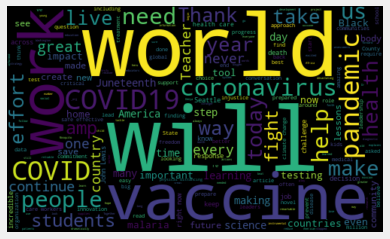

In [119]:
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show

In [120]:
#function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Positive'

In [121]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [122]:
df.head(15)

,Tweets,Subjectivity,Polarity,Analysis
0,Mosquito City is home to the world’s largest c...,0.725000,0.450000,Positive
1,Deaths from malaria have been cut by more than...,0.250000,0.125000,Positive
2,Vaccines prevent millions of deaths every yea...,0.125000,0.000000,Neutral
3,"Ridding the world of preventable, treatable di...",0.394886,0.284091,Positive
4,As a community health worker in Kenya’s Homa ...,0.000000,0.000000,Neutral
5,The progress the world has made against malari...,0.575000,0.325000,Positive
6,"Move aside, . This is the still the world’s de...",0.000000,0.000000,Neutral
7,A safe and effective COVID19 vaccine is the w...,0.766667,0.033333,Positive
8,Because of long-standing barriers that are mad...,0.600000,-0.333333,Negative
9,This commitment is critical. “Additional manu...,0.800000,0.000000,Neutral


In [123]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) +') '+ sortedDF['Tweets'][i])
    print()
    j = j+1


1) Mosquito City is home to the world’s largest captive colony of mosquitoes.  Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. 

2) Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why  WorldMosquitoDay

3) Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future.  

4) The progress the world has made against malaria is one of the greatest success stories ever. The COVID-19 pandemic only reinforces why eradicating malaria is so essential. 

5)  A safe and effective COVID19 vaccine is the way out of this devastating pandemic🌍

Our Director of Vaccine R&amp;D, Melanie…

6) Teaching special education takes an amazing person to figure out exactly what works for each chi

In [124]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) +') '+ sortedDF['Tweets'][i])
    print()
    j = j+1

1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help 

2)  Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4)  “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5)  “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6)  Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US  19 Jun 1865 Union Army Genera…

7) _Nyongo 1. This is Opal Lee

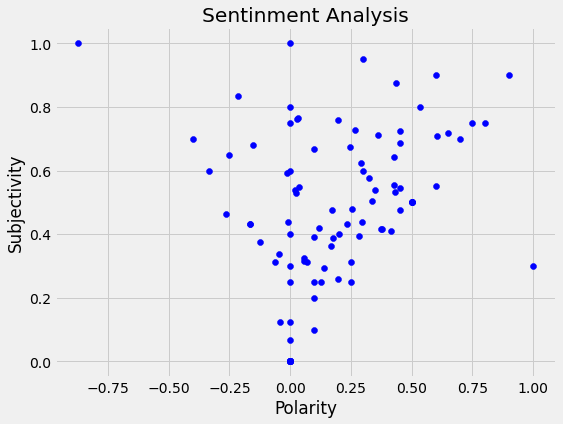

In [125]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentinment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [126]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0]*100),1)

63.0

In [128]:
ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0]*100),1)

15.0

In [129]:
nttweets = df[df.Analysis=='Neutral']
nttweets = nttweets['Tweets']
round((nttweets.shape[0]/df.shape[0]*100),1)

22.0

In [135]:
df['Analysis'].value_counts()

Positive    63
Neutral     22
Negative    15
Name: Analysis, dtype: int64

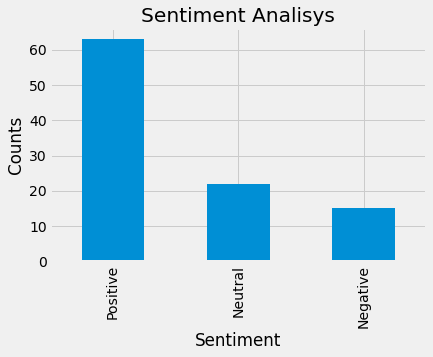

In [136]:
#Show the value counts
#plot and visualize the counts

plt.title('Sentiment Analisys')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()
